In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


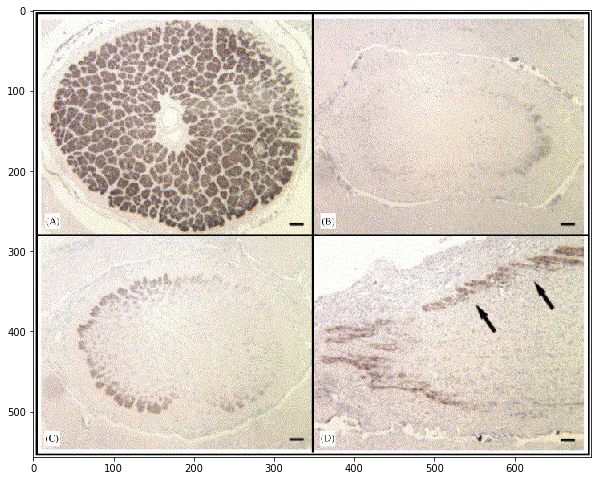

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_fill_holes, binary_opening
import scipy.ndimage.measurements as snm
import scipy.ndimage.filters as flt
from scipy.signal import convolve2d


plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

# -- define the Sobel filters
sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

img = plt.imread("/content/drive/My Drive/cvps20/data/examples/axons_eye.jpg")
plt.imshow(img)

In [ ]:
def sliding_window(image, step, ws):
	# slide a window across the image
	for y in range(0, image.shape[0] - ws[1], step):
		for x in range(0, image.shape[1] - ws[0], step):
			# yield the current window
			yield (x, y, image[y:y + ws[1], x:x + ws[0]])

In [ ]:
size = np.array([200, 200])

a = sliding_window(img, 100, size)

In [ ]:
type(a)

generator

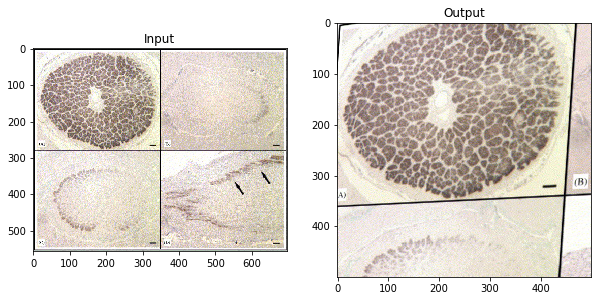

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# 左图中画面中的点的坐标 四个
pts1 = np.float32([[0,0],[368,52],[28,387],[389,390]])
# 变换到新图片中，四个点对应的新的坐标 一一对应
pts2 = np.float32([[0,0],[500,0],[0,500],[500,500]])

# 生成变换矩阵
M = cv2.getPerspectiveTransform(pts1,pts2)
# 进行透视变换
dst = cv2.warpPerspective(img,M,(500,500))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

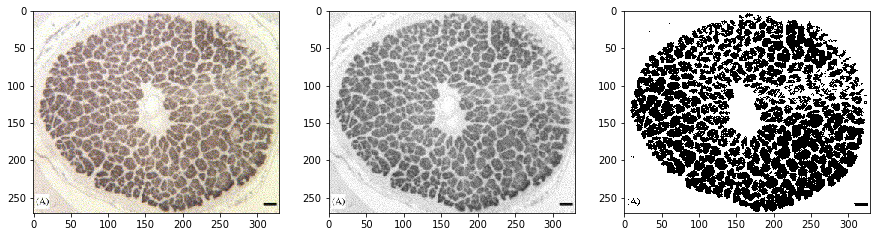

In [ ]:
imgA = img[8:279,12: 342, :]
#imgALum = np.mean(imgA,axis = 2)/255

imgALum = (imgA[:,:,1])/255

othr = threshold_otsu(imgALum)
imgAthr = imgALum < 0.65

fig, ax = plt.subplots(1, 3, figsize = (15, 10))

ax[0].imshow(imgA)
ax[1].imshow(imgALum)
ax[2].imshow(imgAthr, cmap = "Greys")

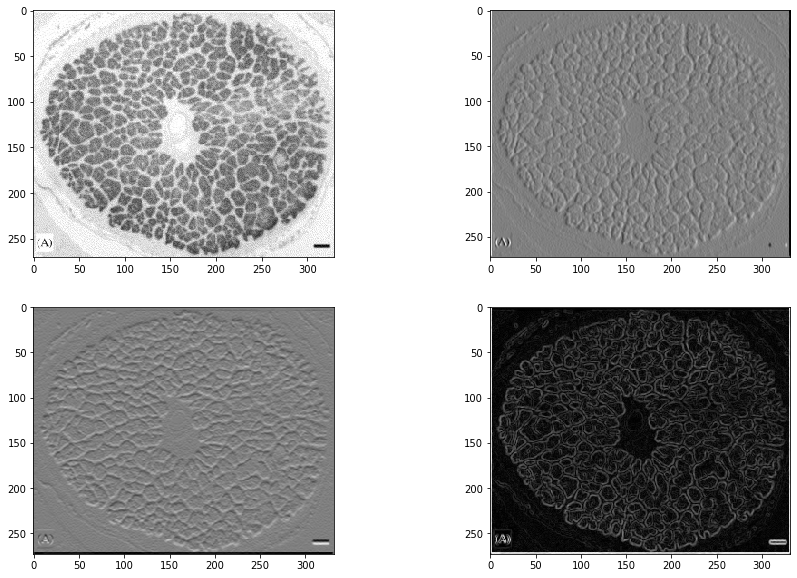

In [ ]:
# -- and on the axon image
Lx = convolve2d(imgALum, sx)
Ly = convolve2d(imgALum, sy)
LL = np.sqrt(Lx**2 + Ly**2)

# -- plot it
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].imshow(imgALum)
ax[0, 1].imshow(Lx)
ax[1, 0].imshow(Ly)
ax[1, 1].imshow(LL)
fig.show()

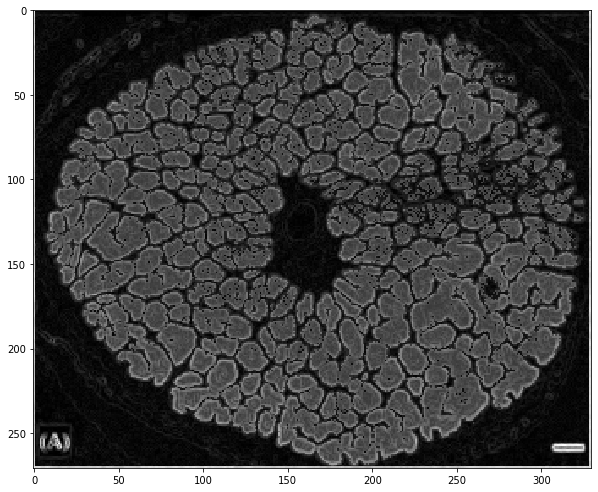

In [ ]:
plt.imshow(LL[1:-1, 1:-1] + imgAthr.astype(float))

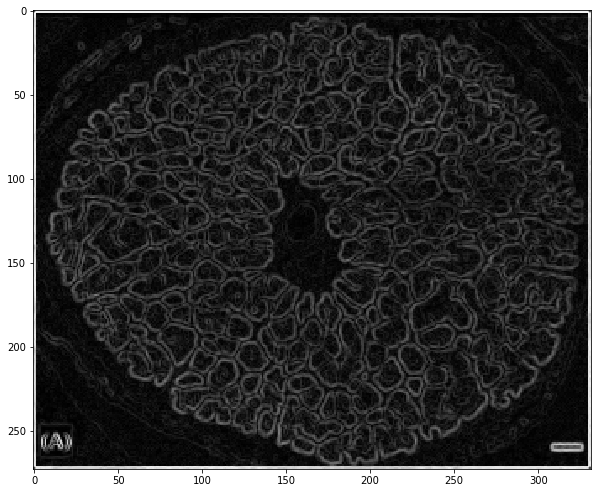

In [ ]:
plt.imshow(LL)

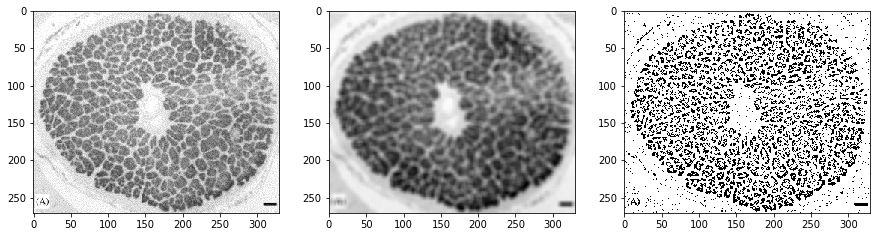

In [ ]:
imgAUn = flt.uniform_filter(imgALum, 7)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(imgALum)
ax[1].imshow(imgAUn)
ax[2].imshow(imgALum < 0.9 * imgAUn, cmap = "Greys")
fig.show()

In [ ]:
plt.imshow(LL1>0.9)

NameError: ignored

In [ ]:
imgAGau = flt.gaussian_filter(LL1.astype(float), sigma=1)
plt.imshow(imgAGau>0.7)

NameError: ignored

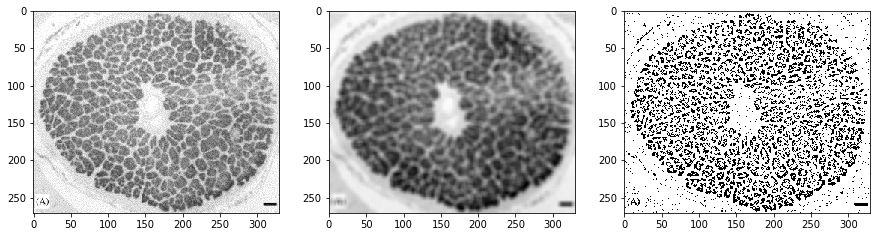

In [ ]:
imgAUn = flt.uniform_filter(imgALum, 7)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(imgALum)
ax[1].imshow(imgAUn)
ax[2].imshow(imgALum < 0.9 * imgAUn, cmap = "Greys")
fig.show()

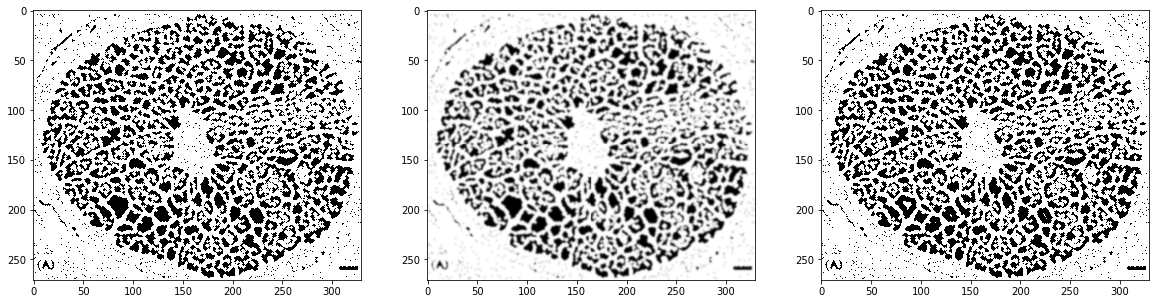

In [ ]:
imgAbi = binary_closing(imgALum < 0.9 * imgAUn, iterations=1)
#imgAbi = binary_closing(imgAbi)
imgAbi = binary_fill_holes(imgAbi)
imgAGau = flt.gaussian_filter(imgAbi.astype(float), sigma=1)

fig, ax = plt.subplots(1,3, figsize = (20,15))
ax[0].imshow(imgAbi, cmap = "Greys")
ax[1].imshow(imgAGau, cmap = 'Greys')
ax[2].imshow(imgAbi >  imgAGau, cmap = "Greys")

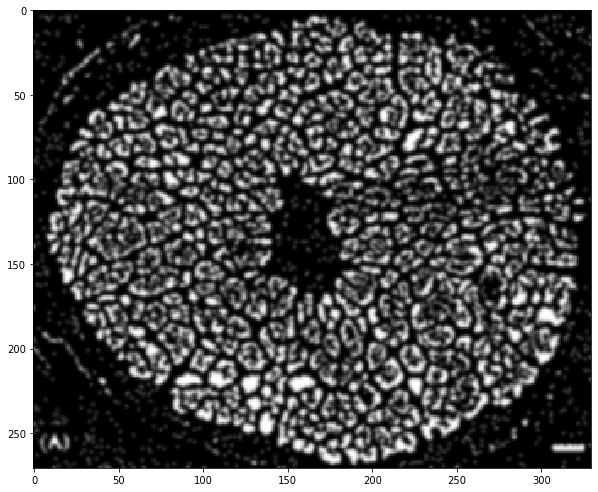

In [ ]:
imgAGau = flt.gaussian_filter(imgAbi.astype(float), sigma=1)


plt.imshow(imgAGau)

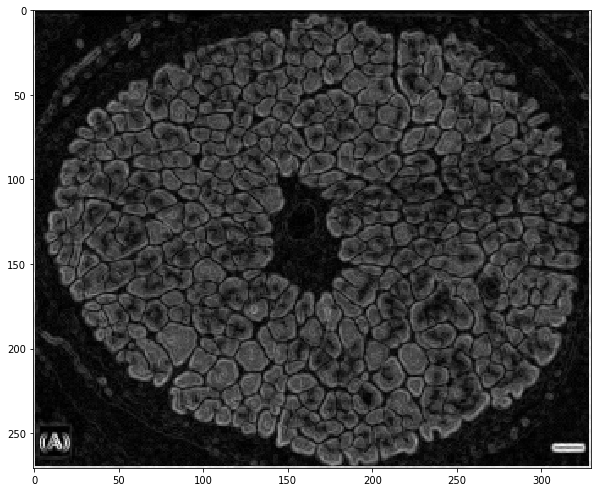

In [ ]:
LLandGau = LL[1:-1, 1:-1] + imgAGau
plt.imshow(LLandGau)

(array([1.438e+03, 3.015e+03, 3.776e+03, 4.028e+03, 4.019e+03, 3.467e+03,
        3.010e+03, 2.791e+03, 2.573e+03, 2.219e+03, 2.121e+03, 1.975e+03,
        1.997e+03, 1.837e+03, 1.781e+03, 1.799e+03, 1.810e+03, 1.786e+03,
        1.846e+03, 1.991e+03, 2.038e+03, 2.199e+03, 2.240e+03, 2.553e+03,
        2.579e+03, 2.613e+03, 2.750e+03, 2.606e+03, 2.538e+03, 2.263e+03,
        2.075e+03, 1.854e+03, 1.707e+03, 1.499e+03, 1.318e+03, 1.094e+03,
        9.700e+02, 7.640e+02, 6.640e+02, 5.210e+02, 4.450e+02, 3.440e+02,
        2.580e+02, 1.980e+02, 1.710e+02, 1.330e+02, 1.070e+02, 6.800e+01,
        5.400e+01, 5.400e+01, 3.900e+01, 2.400e+01, 2.700e+01, 2.000e+01,
        1.900e+01, 1.200e+01, 1.100e+01, 1.300e+01, 2.000e+00, 6.000e+00,
        6.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        7.000e+00, 3.000e+00, 1.000e+00, 1.000e+01, 1.100e+01, 1.700e+01,
        1.900e+01, 2.700e+01, 4.300e+0

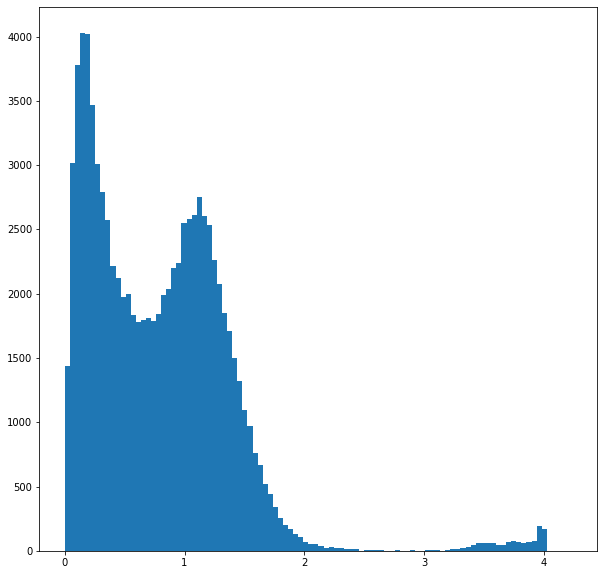

In [ ]:
plt.hist(LLandGau.flatten(), bins=100)

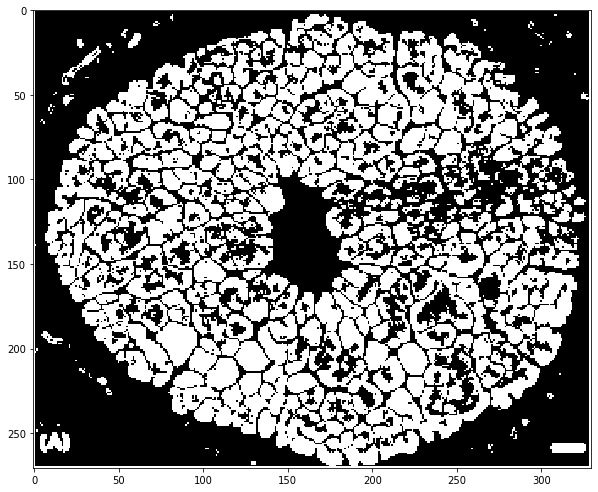

In [ ]:
LLandGauBin = LLandGau > 0.8

plt.imshow(LL)

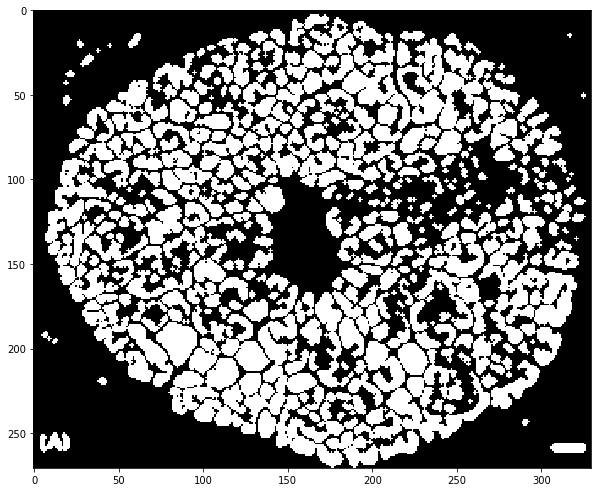

In [ ]:
plt.imshow(binary_opening(binary_opening(LLandGauBin)))

Text(0.5, 1.0, 'approximate number of axons: 345')

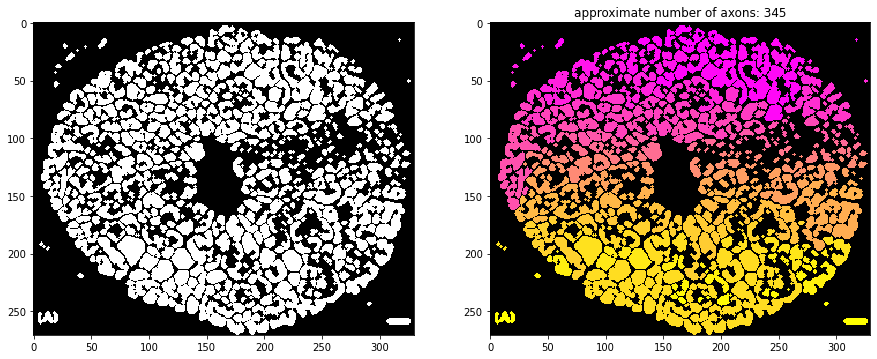

In [ ]:
imgAbi = binary_erosion(LLandGauBin, iterations=1)
imgAbi = binary_dilation(imgAbi, iterations=1)
imgAbi = binary_erosion(imgAbi, iterations=1)
imgAbi = binary_dilation(imgAbi, iterations=1)


labsA, nlabsA = snm.label(imgAbi)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(imgAbi)
ax[1].imshow(labsA, cmap="spring", alpha=imgAbi.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of axons: {0}".format(nlabsA))

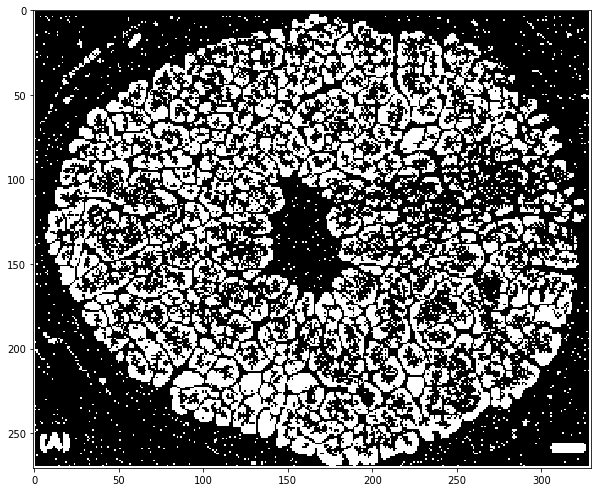

In [ ]:
plt.imshow(AA > 0.8)

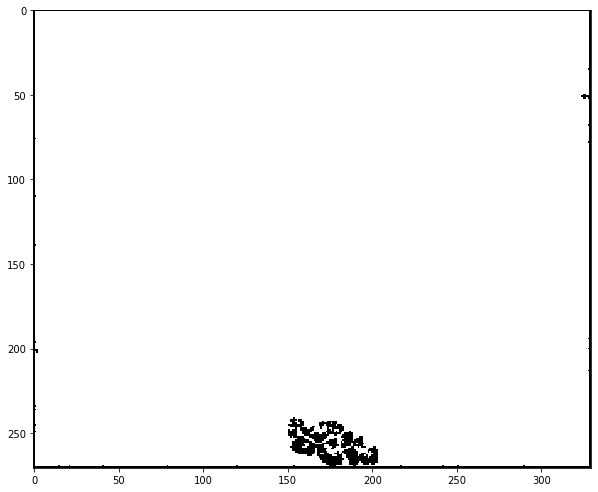

In [ ]:
plt.imshow(binary_fill_holes(AA < 0.8))